In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
df = pd.read_csv('data_jobs.csv')
df.head(2)

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_cz = df[df['job_country'] == 'Czechia']
df_cz

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
526,Data Engineer,Mid-Senior Data Engineer,Czechia,via Trabajo.org,Full-time,False,Czechia,2023-08-29 13:54:39,False,False,Czechia,NaN,NaN,NaN,IESF Group,"[python, dynamodb, aws, azure]","{'cloud': ['aws', 'azure'], 'databases': ['dyn..."
554,Senior Data Engineer,Senior Data Engineer,"Prague, Czechia",via LinkedIn,Contractor,False,Czechia,2023-05-04 13:40:49,True,False,Czechia,NaN,NaN,NaN,Cavendish Professionals,"[go, sql, azure, databricks, bigquery, terraform]","{'cloud': ['azure', 'databricks', 'bigquery'],..."
810,Data Scientist,Data Scientist,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-10-17 13:31:11,False,False,Czechia,NaN,NaN,NaN,Odysseus Data Services s.r.o.,NaN,NaN
992,Business Analyst,BI analyst/developer,Czechia,via Trabajo.org,Full-time,False,Czechia,2023-08-29 13:54:34,True,False,Czechia,NaN,NaN,NaN,ASSIST Software,"[jira, confluence]","{'async': ['jira', 'confluence']}"
1141,Data Analyst,Fraud & Data Analyst,"Prague, Czechia",via LinkedIn,Full-time,False,Czechia,2023-10-19 14:05:14,True,False,Czechia,NaN,NaN,NaN,Resistant AI,"[sql, aws, jupyter, excel]","{'analyst_tools': ['excel'], 'cloud': ['aws'],..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785665,Software Engineer,DevOps Active Directory Engineer,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:32,True,False,Czechia,NaN,NaN,NaN,NN,NaN,NaN
785678,Software Engineer,Java & Microservices Software Engineer - (Hybrid),"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:32,False,False,Czechia,NaN,NaN,NaN,Moody's Investors Service,"[java, mongodb, mongodb, c++, python, c#, kotl...","{'cloud': ['aws'], 'databases': ['mongodb', 'p..."
785683,Machine Learning Engineer,Machine Learning Engineer,Czechia,via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:26,False,False,Czechia,NaN,NaN,NaN,Rohlik.cz,NaN,NaN
785699,Software Engineer,Simulation Engineer,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:30,False,False,Czechia,NaN,NaN,NaN,Ricardo Prague s.r.o.,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"


In [4]:
df_skills = df_cz.explode('job_skills')
df_skills [['job_title', 'job_skills']]

,job_title,job_skills
526,Mid-Senior Data Engineer,python
526,Mid-Senior Data Engineer,dynamodb
526,Mid-Senior Data Engineer,aws
526,Mid-Senior Data Engineer,azure
554,Senior Data Engineer,go
...,...,...
785678,Java & Microservices Software Engineer - (Hybrid),kubernetes
785683,Machine Learning Engineer,NaN
785699,Simulation Engineer,powerpoint
785699,Simulation Engineer,excel


In [11]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
896,sql,Data Engineer,575
895,sql,Data Analyst,521
699,python,Data Engineer,520
700,python,Data Scientist,330
705,python,Software Engineer,309
...,...,...,...
420,julia,Data Engineer,1
418,julia,Business Analyst,1
829,sheets,Cloud Engineer,1
831,sheets,Data Engineer,1


In [15]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

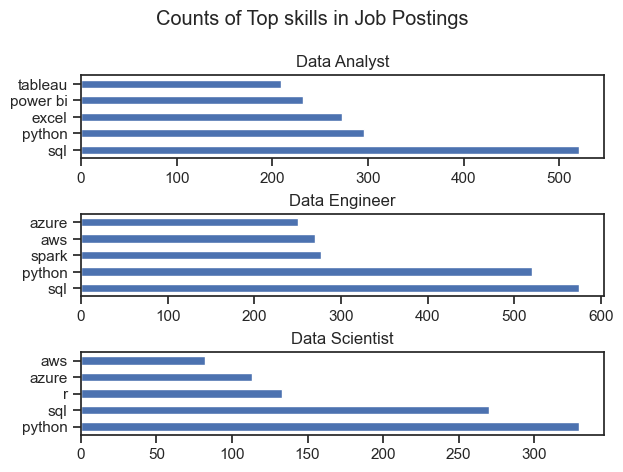

In [33]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)[::-1]
    df_plot.plot(kind='barh', x = 'job_skills', y = 'skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top skills in Job Postings')
plt.tight_layout(h_pad=0.5)


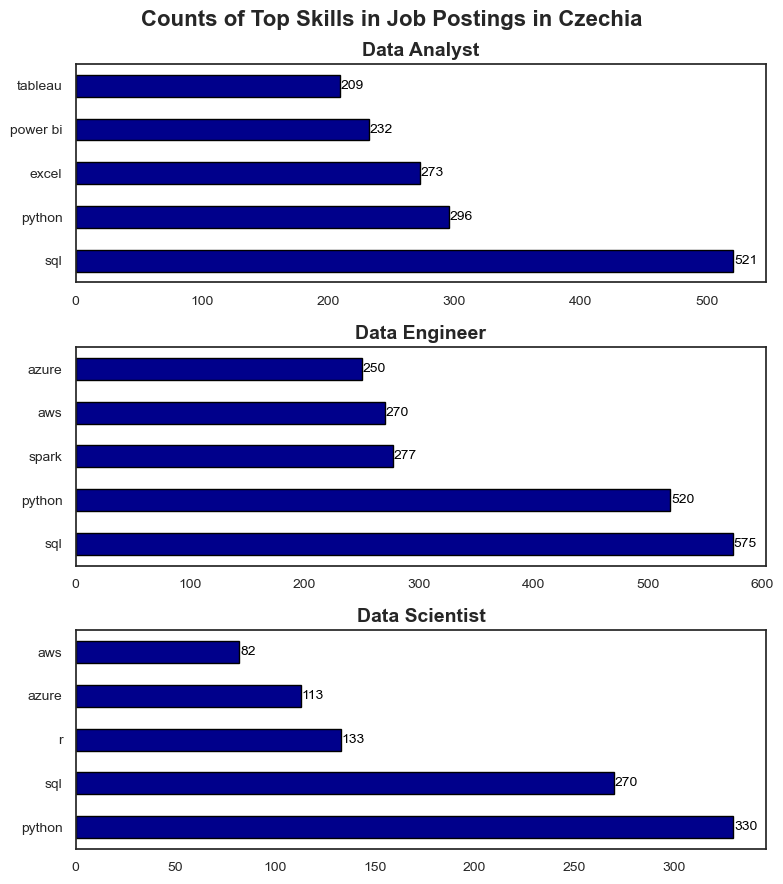

In [41]:
fig, ax = plt.subplots(len(job_titles), 1, figsize=(8, len(job_titles) * 3))

sns.set_theme(style='white')  # Remove grid from the theme

for i, job_title in enumerate(job_titles):
    # Filter and reverse data for each job title
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)[::-1]
    
    # Plot each bar chart
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], color='darkblue', edgecolor='black')
    
    # Styling each subplot
    ax[i].invert_yaxis()
    ax[i].set_title(job_title, fontsize=14, weight='bold')
    ax[i].set_xlabel('')  
    ax[i].set_ylabel('')
    ax[i].tick_params(axis='x', labelsize=10)
    ax[i].tick_params(axis='y', labelsize=10)
    ax[i].legend().set_visible(False)
    ax[i].grid(False)  # Turn off grid for each subplot
    
    # Adding annotations with smaller font size and black color
    for j in ax[i].patches:
        ax[i].text(j.get_width() + 0.5, j.get_y() + j.get_height() / 2,
                   f'{int(j.get_width())}', va='center', fontsize=10, color='black')

# Set the overall title and adjust layout
fig.suptitle('Counts of Top Skills in Job Postings in Czechia', fontsize=16, weight='bold')
plt.tight_layout(h_pad=1)
plt.subplots_adjust(top=0.92)